In [1]:
# Iris Flower Classification - Multiple Models

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Shape of data:", X.shape)

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Define Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# 4. Train, Predict, and Evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("="*50)
    print(f"Model: {name}")
    print("Accuracy:", acc)
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of data: (150, 4)
Model: Logistic Regression
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Model: Decision Tree
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        

  Manufacturer    Model     Type  Min.Price  Price  Max.Price  MPG.city  \
0        Acura  Integra    Small       12.9   15.9       18.8      25.0   
1          NaN   Legend  Midsize       29.2   33.9       38.7      18.0   
2         Audi       90  Compact       25.9   29.1       32.3      20.0   
3         Audi      100  Midsize        NaN   37.7       44.6      19.0   
4          BMW     535i  Midsize        NaN   30.0        NaN      22.0   

   MPG.highway             AirBags DriveTrain  ... Passengers  Length  \
0         31.0                 NaN      Front  ...        5.0   177.0   
1         25.0  Driver & Passenger      Front  ...        5.0   195.0   
2         26.0         Driver only      Front  ...        5.0   180.0   
3         26.0  Driver & Passenger        NaN  ...        6.0   193.0   
4         30.0                 NaN       Rear  ...        4.0   186.0   

   Wheelbase  Width  Turn.circle Rear.seat.room  Luggage.room  Weight  \
0      102.0   68.0         37.0     

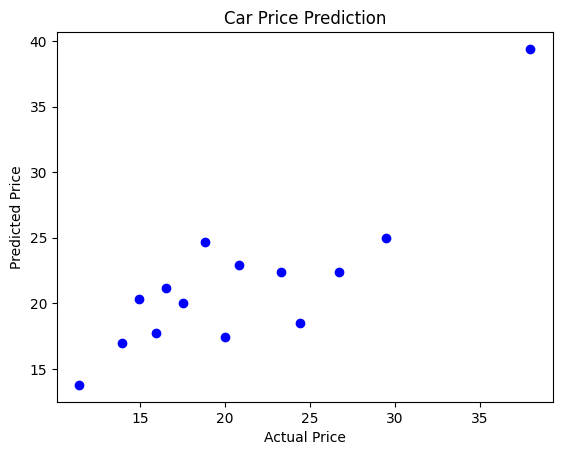

In [2]:
# Car Price Prediction - Regression Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Dataset (Example: car data CSV from Kaggle)
url = "https://raw.githubusercontent.com/selva86/datasets/master/Cars93_miss.csv"
df = pd.read_csv(url)

# Preview
print(df.head())

# 2. Data Preprocessing
# Select important features
df = df[['Price', 'Horsepower', 'MPG.city', 'MPG.highway', 'EngineSize', 'Length', 'Width']]
df = df.dropna()

X = df.drop('Price', axis=1)
y = df['Price']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# 7. Plot Predictions vs Actual
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Car Price Prediction")
plt.show()


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Mean Absolute Error: 1.4607567168117603
Mean Squared Error: 3.1740973539761033
R2 Score: 0.899438024100912


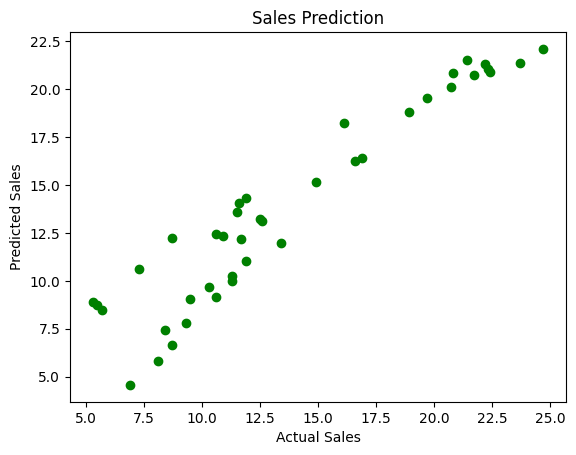

In [4]:
# Sales Prediction - Fixed Column Names

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print(df.head())   # Check column names

# 2. Features & Target (use lowercase column names)
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predict
y_pred = model.predict(X_test)

# 6. Evaluation
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# 7. Visualization
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Sales Prediction")
plt.show()
